In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import keras

from keras import utils as np_utils
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


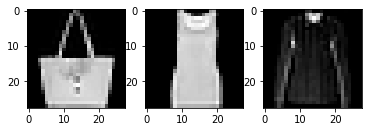

In [4]:
# Plotting 5 images, Subplot arugments represent nrows, ncols and index
# Color map is set to grey since our image dataset is grayscale
plt.subplot(231)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(232)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(233)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.show()

In [5]:
taille_training_set = x_train.shape[0]
taille_test_set = x_test.shape[0]

# Storing the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

#Test data
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Performing one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [6]:
# Set the CNN model
#initialisation du réseau de neurone
classifier = Sequential()

# Step 1 and 2 - Convolution / Pooling
classifier.add(Conv2D(filters=64, kernel_size=7, strides=1, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2),strides=(2,2)))
classifier.add(Dropout(0.25))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection -couche connecté
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dropout(0.5))

# Couche de sortie
classifier.add(Dense(units = 10, activation = 'softmax'))

In [7]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
history = classifier.fit(x_train, y_train,
          batch_size=86,
          epochs=50,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/50
698/698 [==============================] - 35s 6ms/step - loss: 0.6846 - accuracy: 0.7566 - val_loss: 0.3595 - val_accuracy: 0.8661
Epoch 2/50
698/698 [==============================] - 4s 6ms/step - loss: 0.3582 - accuracy: 0.8710 - val_loss: 0.3164 - val_accuracy: 0.8833
Epoch 3/50
698/698 [==============================] - 4s 6ms/step - loss: 0.3147 - accuracy: 0.8844 - val_loss: 0.2947 - val_accuracy: 0.8909
Epoch 4/50
698/698 [==============================] - 4s 6ms/step - loss: 0.2914 - accuracy: 0.8920 - val_loss: 0.2801 - val_accuracy: 0.8980
Epoch 5/50
698/698 [==============================] - 4s 6ms/step - loss: 0.2683 - accuracy: 0.9010 - val_loss: 0.2703 - val_accuracy: 0.8998
Epoch 6/50
698/698 [==============================] - 4s 6ms/step - loss: 0.2526 - accuracy: 0.9047 - val_loss: 0.2632 - val_accuracy: 0.9032
Epoch 7/50
698/698 [==============================] - 4s 6ms/step - loss: 0.2397 - accuracy: 0.9108 - val_loss: 0.2572 - val_accuracy: 0.9067
Epoch

In [13]:
loss, acc = classifier.evaluate(x_test, y_test, verbose=0)
fiabiliter=acc*100
print('La fiabilité du model sur les données de test est de :',fiabiliter," %")

La fiabilité du model sur les données de test est de : 92.08999872207642  %


In [26]:
import os
os.listdir("./")
os.listdir("./drive/MyDrive/LIFPROJET")

['static', 'templates']

In [28]:
classifier.save('./drive/MyDrive/LIFPROJET/classification_model.h5')